![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [47]:
df=pd.read_csv('Hospitalizacion_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Edad                                                                       566 non-null    int64  
 1   Diabetes                                                                   566 non-null    object 
 2   Hospitalización Ultimo Mes                                                 566 non-null    object 
 3   Psa                                                                        562 non-null    float64
 4   Biopsias Previas                                                           564 non-null    object 
 5   Volumen Prostatico                                                         565 non-null    object 
 6   Antibiotico Utilizado En La Profilaxis                    

In [48]:
df.describe()

,Edad,Psa,Numero De Muestras Tomadas,Dias Hospitalizacion Mq,Dias Hospitalización Upc
count,566.000000,562.000000,566.000000,566.000000,566.000000
mean,63.588339,13.296388,13.000000,0.166078,0.014134
std,7.864683,15.691218,3.927665,0.959709,0.196820
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,12.000000,3.000000


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

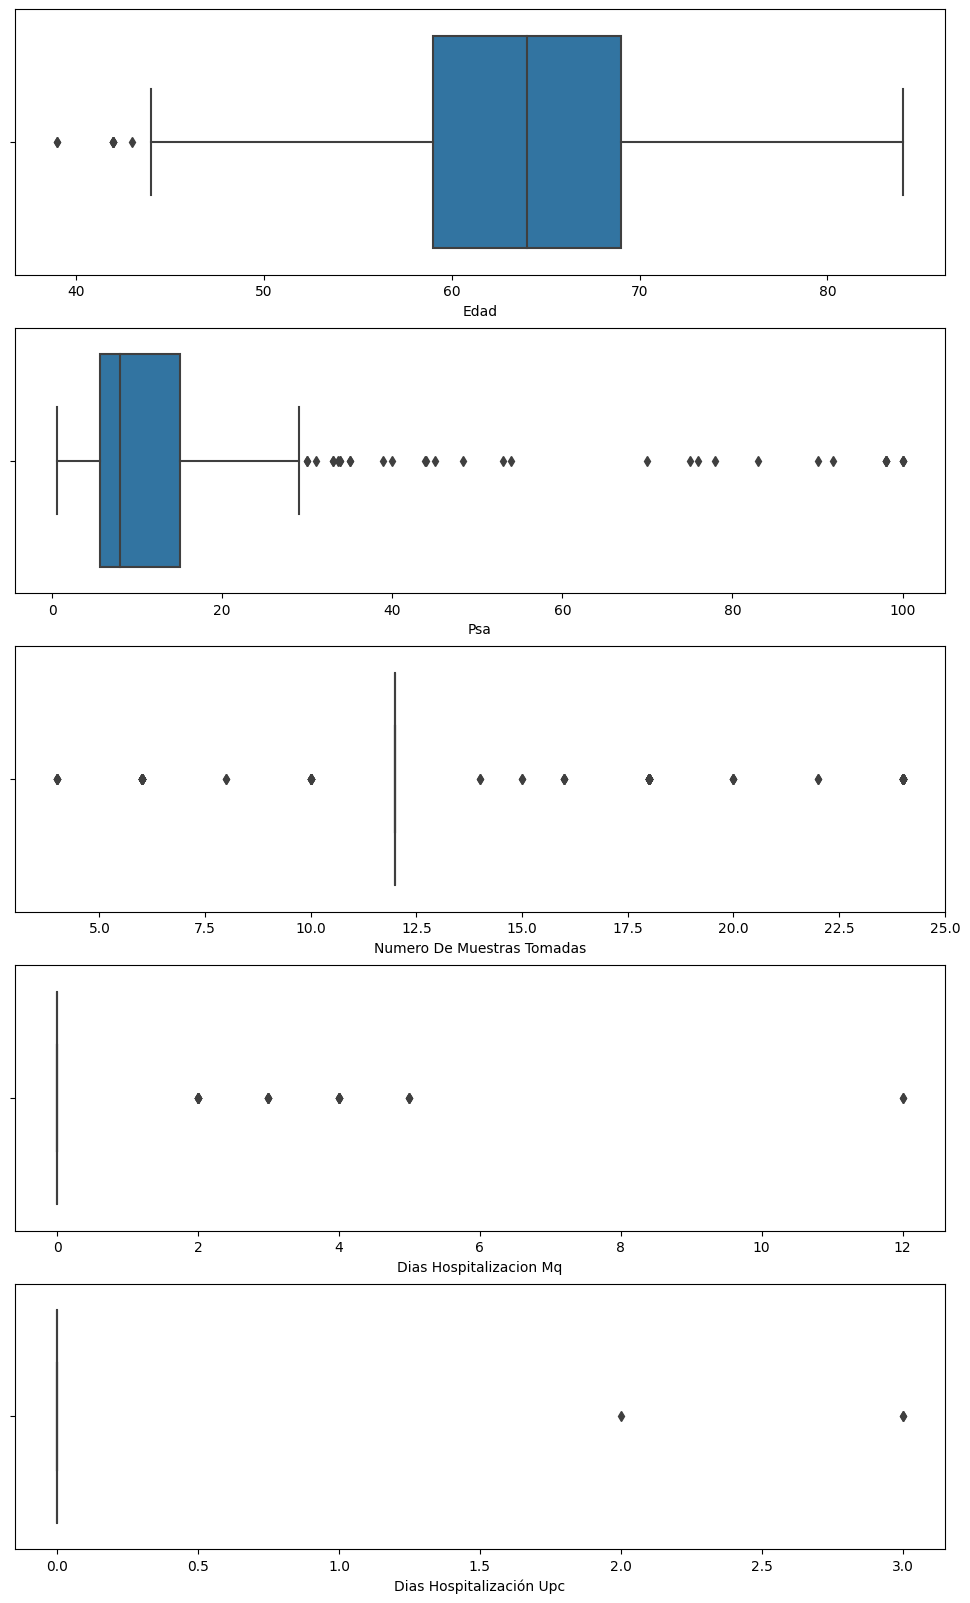

In [49]:
columnas_num2=df.select_dtypes(np.number).columns
fig,ax=plt.subplots(nrows=len(columnas_num2),ncols=1,figsize=(12,20))
for i,col in enumerate(columnas_num2):
    sns.boxplot(x=col,data=df,ax=ax[i])

#### Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

##### El z score se define como:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [50]:
from scipy import stats
def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object_:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df)
#vemos que hay outliers, sin embargo puede haber pacientes con edad <50 años y en dias de Hospitalización también es probable que pasen algunos días en cuidado


Edad | 2 | int64
Psa | 0 | float64
Numero De Muestras Tomadas | 0 | int64
Dias Hospitalizacion Mq | 11 | int64
Dias Hospitalización Upc | 3 | int64


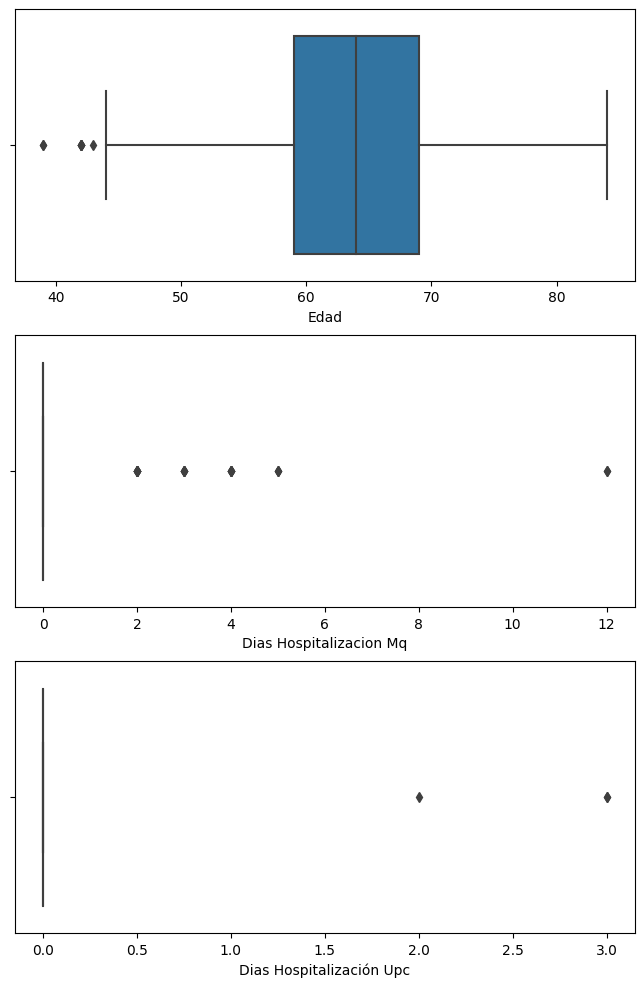

In [51]:
columnas_out=df[['Edad','Dias Hospitalizacion Mq','Dias Hospitalización Upc']].columns
fig,ax=plt.subplots(nrows=len(columnas_out),ncols=1,figsize=(8,12))
for i,col in enumerate(columnas_out):
    sns.boxplot(x=col,data=df,ax=ax[i])

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

- Se eliminaron datos atípicos en edad, ya que no es normal encontrar personas mayores a los 100 años

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

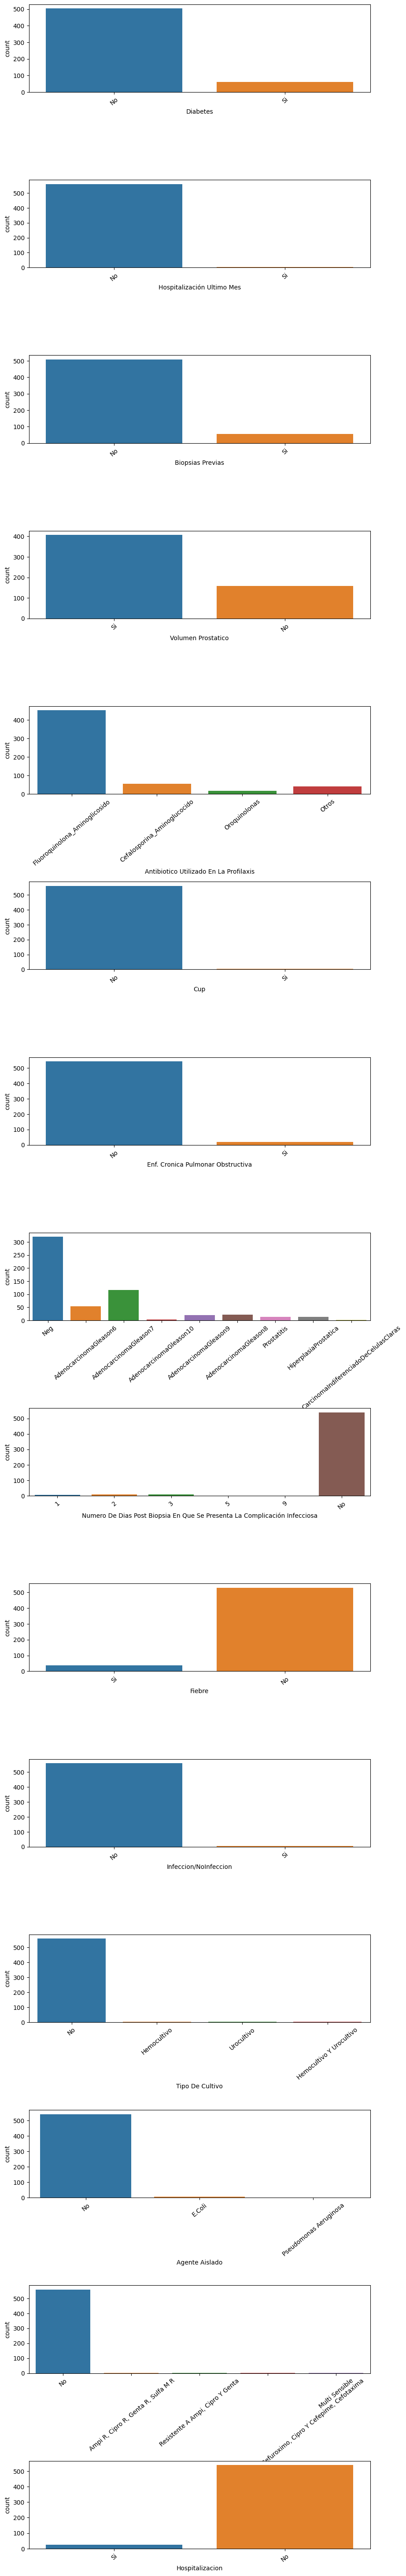

In [52]:
columnas_cat=df.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(nrows=len(columnas_cat), ncols=1, figsize=(10, 5 * len(columnas_cat)))
fig.subplots_adjust(hspace=1.0)

for i, col in enumerate(columnas_cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40)

In [53]:
#Renombramos nombres de columnas, para una mejor comprensión
df.rename(columns={'Cup':'Uso de Cateter Urinario'},inplace=True)
df.rename(columns={'Psa':'Concentracion de Psa en la sangre'},inplace=True)

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [54]:
#porcentaje de nulos por columna
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

Edad | 0.0 | int64
Diabetes | 0.0 | object
Hospitalización Ultimo Mes | 0.0 | object
Concentracion de Psa en la sangre | 0.007067137809187279 | float64
Biopsias Previas | 0.0035335689045936395 | object
Volumen Prostatico | 0.0017667844522968198 | object
Antibiotico Utilizado En La Profilaxis | 0.0 | object
Numero De Muestras Tomadas | 0.0 | int64
Uso de Cateter Urinario | 0.0017667844522968198 | object
Enf. Cronica Pulmonar Obstructiva | 0.0035335689045936395 | object
Biopsia | 0.0 | object
Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa | 0.0 | object
Fiebre | 0.0 | object
Infeccion/NoInfeccion | 0.0 | object
Tipo De Cultivo | 0.0 | object
Agente Aislado | 0.030035335689045935 | object
Patron De Resistencia | 0.0 | object
Hospitalizacion | 0.00530035335689046 | object
Dias Hospitalizacion Mq | 0.0 | int64
Dias Hospitalización Upc | 0.0 | int64


Vemos que en Psa,Biopsias Previas,Volumen Prostatico,Cup,Enf. Cronica Pulmonar Obstructiva,Agente Aislado,Hospitalizacion hay valores faltantes. 

- En Hospitalización, los valores faltantes existentes, obervamos que no estuvieron en dias en Mq o Upc asi que los llenamos con 'No'

In [55]:
df.Hospitalizacion.fillna('No',inplace=True)


- Para el resto de valores faltantes, optamos por eliminarlos ya que era muy poco porcentaje de faltantes

In [56]:
df.dropna(inplace=True)

In [57]:
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

Edad | 0.0 | int64
Diabetes | 0.0 | object
Hospitalización Ultimo Mes | 0.0 | object
Concentracion de Psa en la sangre | 0.0 | float64
Biopsias Previas | 0.0 | object
Volumen Prostatico | 0.0 | object
Antibiotico Utilizado En La Profilaxis | 0.0 | object
Numero De Muestras Tomadas | 0.0 | int64
Uso de Cateter Urinario | 0.0 | object
Enf. Cronica Pulmonar Obstructiva | 0.0 | object
Biopsia | 0.0 | object
Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa | 0.0 | object
Fiebre | 0.0 | object
Infeccion/NoInfeccion | 0.0 | object
Tipo De Cultivo | 0.0 | object
Agente Aislado | 0.0 | object
Patron De Resistencia | 0.0 | object
Hospitalizacion | 0.0 | object
Dias Hospitalizacion Mq | 0.0 | int64
Dias Hospitalización Upc | 0.0 | int64


- Para el caso de las variables numéricas, ¿Es necesario normalizar?
    1. Procedemos a plotear las variables numéricas para observar la distribución de cada variable con ipywidgets y la función interact

In [58]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribucion de la variable {}'.format(col))
    plt.show()
    
columnas_numericas = df.select_dtypes(['int', 'float']).columns

from ipywidgets import interact, fixed
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(df));

interactive(children=(Dropdown(description='col', options=('Edad', 'Concentracion de Psa en la sangre', 'Numer…

- La funcion de scipy.stats `probplot` compara la distribucion de una variable con una distribucion teorica (la normal por defecto), cuanto más se parezca la gráfica a una linea de 45 grados más normal será.

In [59]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(df[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()
interact(normalidad_variable_numerica, col=columnas_numericas);

interactive(children=(Dropdown(description='col', options=('Edad', 'Concentracion de Psa en la sangre', 'Numer…

- Vemos un KDE de Dias Hospitalizacion Mq y Dias Hospitalización Upc por separado

(-1.5112388780265007, 2.0)

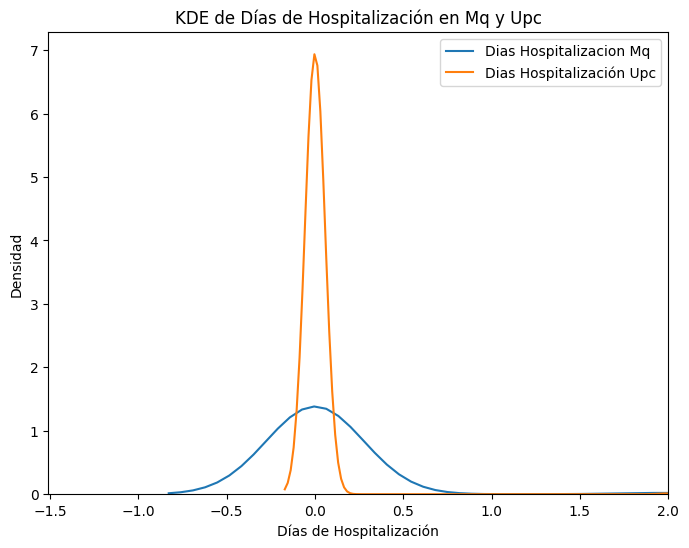

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(df['Dias Hospitalizacion Mq'], label='Dias Hospitalizacion Mq', ax=ax)
sns.kdeplot(df['Dias Hospitalización Upc'], label='Dias Hospitalización Upc', ax=ax)

ax.set_xlabel('Días de Hospitalización')
ax.set_ylabel('Densidad')
ax.set_title('KDE de Días de Hospitalización en Mq y Upc')
ax.legend()
ax.set_xlim(right=2) #Para visualizarlo mejor


In [61]:
columnas_categoricas = df.select_dtypes(['object']).columns
def distribucion_variable_categorica(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
interact(distribucion_variable_categorica, col=columnas_categoricas)

interactive(children=(Dropdown(description='col', options=('Diabetes', 'Hospitalización Ultimo Mes', 'Biopsias…

<function __main__.distribucion_variable_categorica(col)>

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

- Consideraciones:
    1. Patron De Resistencia 
    2. Biopsia (Hay negativos y 6 tipos de biopsia)
    3. Tipo De Cultivo (No y 3 tipos de cultivo)
    4. Agente Aislado (No y 2 tipos de agentes aislados)
    5. Antibiotico Utilizado En La Profilaxis

In [62]:
df

,Edad,Diabetes,Hospitalización Ultimo Mes,Concentracion de Psa en la sangre,Biopsias Previas,Volumen Prostatico,Antibiotico Utilizado En La Profilaxis,Numero De Muestras Tomadas,Uso de Cateter Urinario,Enf. Cronica Pulmonar Obstructiva,Biopsia,Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa,Fiebre,Infeccion/NoInfeccion,Tipo De Cultivo,Agente Aislado,Patron De Resistencia,Hospitalizacion,Dias Hospitalizacion Mq,Dias Hospitalización Upc
0,53,No,No,4.0,No,Si,Fluoroquinolona_Aminoglicosido,12,No,No,Neg,1,Si,No,No,No,No,Si,2,0
1,56,No,No,7.7,No,Si,Fluoroquinolona_Aminoglicosido,12,No,No,Neg,1,Si,No,No,No,No,Si,5,0
2,57,No,No,29.0,Si,Si,Fluoroquinolona_Aminoglicosido,24,No,No,Neg,1,Si,No,Hemocultivo,E.Coli,"Ampi R, Cipro R, Genta R, Sulfa M R",Si,4,3
3,56,No,No,7.0,No,Si,Fluoroquinolona_Aminoglicosido,12,No,No,Neg,1,Si,No,No,No,No,Si,5,0
4,55,No,No,29.0,Si,Si,Fluoroquinolona_Aminoglicosido,24,No,No,Neg,1,Si,No,Hemocultivo,E.Coli,No,Si,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,57,No,No,4.8,No,No,Otros,12,No,No,Neg,No,No,No,No,No,No,No,0,0
559,75,No,No,75.0,No,Si,Fluoroquinolona_Aminoglicosido,12,No,No,AdenocarcinomaGleason8,No,No,No,No,No,No,No,0,0
560,78,No,No,9.3,No,Si,Cefalosporina_Aminoglucocido,12,No,No,Neg,No,No,No,No,No,No,No,0,0
561,67,No,No,6.0,No,Si,Fluoroquinolona_Aminoglicosido,12,No,No,AdenocarcinomaGleason6,No,No,No,No,No,No,No,0,0


In [63]:
#Eliminamos columnas que considero innecesarias
df.drop(columns=['Numero De Muestras Tomadas','Numero De Dias Post Biopsia En Que Se Presenta La Complicación Infecciosa','Hospitalización Ultimo Mes','Biopsias Previas','Numero De Muestras Tomadas'],inplace=True)

In [64]:
#Reemplazamos los valores No->0, Si->1
df.replace('No',0, inplace=True)
df.replace('Si',1, inplace=True)

In [65]:
#Reemplazamos los valores False->0, True->1 // Hacemos dummies a las columnas mencionadas para obervar la correlación
df_dummies = pd.get_dummies(df,columns=['Patron De Resistencia','Biopsia','Tipo De Cultivo','Agente Aislado','Antibiotico Utilizado En La Profilaxis'])
df_dummies.replace({True:1, False:0},inplace=True)
df_dummies.shape

(542, 36)

In [66]:
corr = df_dummies.corr()
corr.style.background_gradient(cmap='coolwarm')

,Edad,Diabetes,Concentracion de Psa en la sangre,Volumen Prostatico,Uso de Cateter Urinario,Enf. Cronica Pulmonar Obstructiva,Fiebre,Infeccion/NoInfeccion,Hospitalizacion,Dias Hospitalizacion Mq,Dias Hospitalización Upc,Patron De Resistencia_0,"Patron De Resistencia_ Ampi R, Cipro R, Genta R, Sulfa M R",Patron De Resistencia_Multi Sensible,"Patron De Resistencia_Resistente A Ampi, Cipro Y Genta","Patron De Resistencia_Resistente A Ampi, Sulfa, Cefadroxilo, Cefuroximo, Cipro Y Cefepime, Cefotaxima",Biopsia_AdenocarcinomaGleason10,Biopsia_AdenocarcinomaGleason6,Biopsia_AdenocarcinomaGleason7,Biopsia_AdenocarcinomaGleason8,Biopsia_AdenocarcinomaGleason9,Biopsia_CarcinomaIndiferenciadoDeCelulasClaras,Biopsia_HiperplasiaProstatica,Biopsia_Neg,Biopsia_Prostatitis,Tipo De Cultivo_0,Tipo De Cultivo_Hemocultivo,Tipo De Cultivo_Hemocultivo Y Urocultivo,Tipo De Cultivo_Urocultivo,Agente Aislado_0,Agente Aislado_E.Coli,Agente Aislado_Pseudomonas Aeruginosa,Antibiotico Utilizado En La Profilaxis_Cefalosporina_Aminoglucocido,Antibiotico Utilizado En La Profilaxis_Fluoroquinolona_Aminoglicosido,Antibiotico Utilizado En La Profilaxis_Oroquinolonas,Antibiotico Utilizado En La Profilaxis_Otros
Edad,1.000000,0.140700,0.188282,0.253796,0.135517,0.107800,0.006514,-0.003369,-0.051505,-0.018562,-0.035662,0.016743,-0.035839,0.041719,-0.077695,0.030162,0.184636,0.037757,0.062553,0.198139,0.156482,0.134168,-0.103198,-0.201440,-0.078314,0.032304,-0.058434,0.030162,-0.025486,0.032304,-0.061408,0.041719,-0.120021,0.022212,0.061716,0.063075
Diabetes,0.140700,1.000000,-0.025083,0.097892,-0.030989,-0.005466,-0.026027,0.017377,0.068124,0.075111,-0.026401,-0.010230,-0.015452,0.073731,-0.021872,-0.021872,-0.030989,-0.061491,-0.024382,-0.012081,0.114146,0.073731,-0.056340,0.015639,0.051106,-0.004080,-0.021872,-0.021872,0.036738,-0.004080,-0.038025,0.073731,0.071192,-0.059961,0.001841,0.009409
Concentracion de Psa en la sangre,0.188282,-0.025083,1.000000,0.135627,0.088506,0.201958,-0.038655,-0.027942,-0.064352,-0.034767,0.043557,0.009865,0.042172,0.002344,-0.023082,-0.027479,0.291379,-0.005650,-0.023895,0.413396,0.243525,-0.034380,-0.064025,-0.256055,-0.001767,-0.005771,0.059695,-0.027479,-0.014692,-0.005771,0.005293,0.002344,-0.021457,0.077086,-0.058840,-0.055371
Volumen Prostatico,0.253796,0.097892,0.135627,1.000000,0.054323,0.031108,0.053044,0.066656,0.031153,0.045707,0.046280,-0.072064,0.027086,0.038341,0.038341,0.038341,0.054323,0.045664,-0.146598,0.041692,-0.006887,0.038341,0.072024,0.041958,-0.000571,-0.077111,0.038341,0.038341,0.054323,-0.077111,0.066656,0.038341,-0.005049,-0.018418,0.113368,-0.041226
Uso de Cateter Urinario,0.135517,-0.030989,0.088506,0.054323,1.000000,-0.016435,-0.022999,-0.009123,-0.018152,-0.014899,-0.006334,0.009863,-0.003707,-0.005248,-0.005248,-0.005248,0.496283,-0.028683,-0.043758,-0.017311,-0.016878,-0.005248,-0.013517,-0.010253,-0.014041,0.010554,-0.005248,-0.005248,-0.007435,0.010554,-0.009123,-0.005248,-0.028977,0.044006,-0.015516,-0.024340
Enf. Cronica Pulmonar Obstructiva,0.107800,-0.005466,0.201958,0.031108,-0.016435,1.000000,-0.050840,-0.020166,-0.040124,-0.032934,-0.014001,0.021802,-0.008195,-0.011600,-0.011600,-0.011600,0.217978,0.070572,-0.022152,0.065695,0.069119,-0.011600,-0.029879,-0.093381,-0.031037,0.023329,-0.011600,-0.011600,-0.016435,0.023329,-0.020166,-0.011600,0.135279,-0.150484,0.080808,0.022937
Fiebre,0.006514,-0.026027,-0.038655,0.053044,-0.022999,-0.050840,1.000000,0.396659,0.678964,0.586810,0.275405,-0.428841,0.161185,0.228161,0.228161,0.228161,-0.022999,0.034962,-0.061923,-0.053551,-0.012908,-0.016233,-0.041814,0.087665,-0.043433,-0.458879,0.228161,0.228161,0.323268,-0.458879,0.396659,0.228161,-0.016026,0.008035,0.037018,-0.018614
Infeccion/NoInfeccion,-0.003369,0.017377,-0.027942,0.066656,-0.009123,-0.020166,0.396659,1.000000,0.502589,0.653188,-0.007772,-0.924956,-0.004549,0.575208,0.575208,0.575208,-0.009123,-0.035195,0.033699,-0.021241,-0.020710,-0.006439,-0.016586,0.022935,-0.017228,-0.864408,-0.0064

In [67]:
df_dummies

,Edad,Diabetes,Concentracion de Psa en la sangre,Volumen Prostatico,Uso de Cateter Urinario,Enf. Cronica Pulmonar Obstructiva,Fiebre,Infeccion/NoInfeccion,Hospitalizacion,Dias Hospitalizacion Mq,...,Tipo De Cultivo_Hemocultivo,Tipo De Cultivo_Hemocultivo Y Urocultivo,Tipo De Cultivo_Urocultivo,Agente Aislado_0,Agente Aislado_E.Coli,Agente Aislado_Pseudomonas Aeruginosa,Antibiotico Utilizado En La Profilaxis_Cefalosporina_Aminoglucocido,Antibiotico Utilizado En La Profilaxis_Fluoroquinolona_Aminoglicosido,Antibiotico Utilizado En La Profilaxis_Oroquinolonas,Antibiotico Utilizado En La Profilaxis_Otros
0,53,0,4.0,1,0,0,1,0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,56,0,7.7,1,0,0,1,0,1,5,...,0,0,0,1,0,0,0,1,0,0
2,57,0,29.0,1,0,0,1,0,1,4,...,1,0,0,0,1,0,0,1,0,0
3,56,0,7.0,1,0,0,1,0,1,5,...,0,0,0,1,0,0,0,1,0,0
4,55,0,29.0,1,0,0,1,0,1,4,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,57,0,4.8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
559,75,0,75.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
560,78,0,9.3,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
561,67,0,6.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [68]:
#Eliminamos columnas innecesarias o redundantes
df_dummies.drop(columns=['Dias Hospitalizacion Mq','Dias Hospitalización Upc','Concentracion de Psa en la sangre','Fiebre'],inplace=True)


In [69]:
corr = df_dummies.corr()
corr.style.background_gradient(cmap='coolwarm')

,Edad,Diabetes,Volumen Prostatico,Uso de Cateter Urinario,Enf. Cronica Pulmonar Obstructiva,Infeccion/NoInfeccion,Hospitalizacion,Patron De Resistencia_0,"Patron De Resistencia_ Ampi R, Cipro R, Genta R, Sulfa M R",Patron De Resistencia_Multi Sensible,"Patron De Resistencia_Resistente A Ampi, Cipro Y Genta","Patron De Resistencia_Resistente A Ampi, Sulfa, Cefadroxilo, Cefuroximo, Cipro Y Cefepime, Cefotaxima",Biopsia_AdenocarcinomaGleason10,Biopsia_AdenocarcinomaGleason6,Biopsia_AdenocarcinomaGleason7,Biopsia_AdenocarcinomaGleason8,Biopsia_AdenocarcinomaGleason9,Biopsia_CarcinomaIndiferenciadoDeCelulasClaras,Biopsia_HiperplasiaProstatica,Biopsia_Neg,Biopsia_Prostatitis,Tipo De Cultivo_0,Tipo De Cultivo_Hemocultivo,Tipo De Cultivo_Hemocultivo Y Urocultivo,Tipo De Cultivo_Urocultivo,Agente Aislado_0,Agente Aislado_E.Coli,Agente Aislado_Pseudomonas Aeruginosa,Antibiotico Utilizado En La Profilaxis_Cefalosporina_Aminoglucocido,Antibiotico Utilizado En La Profilaxis_Fluoroquinolona_Aminoglicosido,Antibiotico Utilizado En La Profilaxis_Oroquinolonas,Antibiotico Utilizado En La Profilaxis_Otros
Edad,1.000000,0.140700,0.253796,0.135517,0.107800,-0.003369,-0.051505,0.016743,-0.035839,0.041719,-0.077695,0.030162,0.184636,0.037757,0.062553,0.198139,0.156482,0.134168,-0.103198,-0.201440,-0.078314,0.032304,-0.058434,0.030162,-0.025486,0.032304,-0.061408,0.041719,-0.120021,0.022212,0.061716,0.063075
Diabetes,0.140700,1.000000,0.097892,-0.030989,-0.005466,0.017377,0.068124,-0.010230,-0.015452,0.073731,-0.021872,-0.021872,-0.030989,-0.061491,-0.024382,-0.012081,0.114146,0.073731,-0.056340,0.015639,0.051106,-0.004080,-0.021872,-0.021872,0.036738,-0.004080,-0.038025,0.073731,0.071192,-0.059961,0.001841,0.009409
Volumen Prostatico,0.253796,0.097892,1.000000,0.054323,0.031108,0.066656,0.031153,-0.072064,0.027086,0.038341,0.038341,0.038341,0.054323,0.045664,-0.146598,0.041692,-0.006887,0.038341,0.072024,0.041958,-0.000571,-0.077111,0.038341,0.038341,0.054323,-0.077111,0.066656,0.038341,-0.005049,-0.018418,0.113368,-0.041226
Uso de Cateter Urinario,0.135517,-0.030989,0.054323,1.000000,-0.016435,-0.009123,-0.018152,0.009863,-0.003707,-0.005248,-0.005248,-0.005248,0.496283,-0.028683,-0.043758,-0.017311,-0.016878,-0.005248,-0.013517,-0.010253,-0.014041,0.010554,-0.005248,-0.005248,-0.007435,0.010554,-0.009123,-0.005248,-0.028977,0.044006,-0.015516,-0.024340
Enf. Cronica Pulmonar Obstructiva,0.107800,-0.005466,0.031108,-0.016435,1.000000,-0.020166,-0.040124,0.021802,-0.008195,-0.011600,-0.011600,-0.011600,0.217978,0.070572,-0.022152,0.065695,0.069119,-0.011600,-0.029879,-0.093381,-0.031037,0.023329,-0.011600,-0.011600,-0.016435,0.023329,-0.020166,-0.011600,0.135279,-0.150484,0.080808,0.022937
Infeccion/NoInfeccion,-0.003369,0.017377,0.066656,-0.009123,-0.020166,1.000000,0.502589,-0.924956,-0.004549,0.575208,0.575208,0.575208,-0.009123,-0.035195,0.033699,-0.021241,-0.020710,-0.006439,-0.016586,0.022935,-0.017228,-0.864408,-0.006439,0.575208,0.814978,-0.864408,0.662935,0.575208,-0.035556,0.053997,-0.019039,-0.029866
Hospitalizacion,-0.051505,0.068124,0.031153,-0.018152,-0.040124,0.502589,1.000000,-0.543365,0.204231,0.289093,0.289093,0.289093,-0.018152,-0.008908,-0.061472,-0.042264,-0.041206,-0.012811,-0.033001,0.113226,-0.034279,-0.581426,0.289093,0.289093,0.409599,-0.581426,0.502589,0.289093,-0.010122,0.017016,0.067140,-0.059424
Patron De Resistencia_0,0.016743,-0.010230,-0.072064,0.009863,0.021802,-0.924956,-0.543365,1.000000,-0.375863,-0.532042,-0.532042,-0.532042,0.009863,0.038050,-0.022936,0.022965,0.022390,0.006961,0.017931,-0.035766,0.018626,0.934540,-0.262540,-0.532042,-0.753818,0.934540,-0.768780,-0.532042,0.038440,-0.058378,0.020583,0.032289
"Patron De Resistencia_ Ampi R, Cipro R, Genta R, Sulfa M R",-0.035839,-0.015452,0.027086,-0.003707,-0.008195,-0.004549,0.204231,-0.375863,1.000000,-0.002616,-0.002616,-0.002616,-0.003707,-0.014302,-0.021818,-0.008632,-0.008416,-0.002616,-0.006740,0.038184,-0.007001,-0.351259,0.706453,-0.002616,-0.003707,-0

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [70]:
df_dummies

,Edad,Diabetes,Volumen Prostatico,Uso de Cateter Urinario,Enf. Cronica Pulmonar Obstructiva,Infeccion/NoInfeccion,Hospitalizacion,Patron De Resistencia_0,"Patron De Resistencia_ Ampi R, Cipro R, Genta R, Sulfa M R",Patron De Resistencia_Multi Sensible,...,Tipo De Cultivo_Hemocultivo,Tipo De Cultivo_Hemocultivo Y Urocultivo,Tipo De Cultivo_Urocultivo,Agente Aislado_0,Agente Aislado_E.Coli,Agente Aislado_Pseudomonas Aeruginosa,Antibiotico Utilizado En La Profilaxis_Cefalosporina_Aminoglucocido,Antibiotico Utilizado En La Profilaxis_Fluoroquinolona_Aminoglicosido,Antibiotico Utilizado En La Profilaxis_Oroquinolonas,Antibiotico Utilizado En La Profilaxis_Otros
0,53,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,56,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,57,0,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,56,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,55,0,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,57,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
559,75,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
560,78,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
561,67,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [71]:
df_dummies.shape

(542, 32)

In [72]:
#Exportamos a csv para seguir con el modelamiento en el siguiente paso
df_final= df_dummies.to_csv('Hospitalizacion_3.csv',index=False)